# MambaIR Online Colab Demo

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/pdf/2411.15269)
[![GitHub Stars](https://img.shields.io/github/stars/csguoh/MambaIR?style=social)](https://github.com/csguoh/MambaIR)
[![download](https://img.shields.io/github/downloads/csguoh/MambaIR/total.svg)](https://github.com/csguoh/MambaIR/releases)

This notebook shows how to restore images with the **state-of-the-art** Mamba-based image resotration backbone **[MambaIR](https://arxiv.org/abs/2402.15648)/[MambaIRv2](https://arxiv.org/abs/2411.15269)**. You just need to upload the images to be restored, run the command line, and that's all.

In particular, we will use the **MambaIRv2-Base model on 4x image super-resolution** as a representative. One can also seamlessly change to other tasks and our MambaIRv1 model.


# 1. Preparations

This notebook uses the **MambaIRv2 Lightweight x4 SR model** for image super-resolution. The environment is already set up via Docker, and the pre-trained model is available in the `experiments/pretrained_models/` folder.

# 2. Upload Images

Upload the images to be processed. Since this is running locally via Docker, you'll need to place images in the `./samples/inputs` folder.

In [ ]:
import os
import glob
import shutil


upload_folder = './samples/inputs'
result_folder = './samples/results'


if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)

os.makedirs(upload_folder, exist_ok=True)
os.makedirs(result_folder, exist_ok=True)

print(f"Input folder ready: {upload_folder}")
print(f"Results will be saved to: {result_folder}")
print(f"Please place your images in the '{upload_folder}' folder")

Saving img_002_SRF_4_LR.png to img_002_SRF_4_LR.png
move img_002_SRF_4_LR.png to ./samples/inputs/img_002_SRF_4_LR.png


# 3. Inference


In [ ]:
import torch
import torch.nn as nn
import os
from tqdm import tqdm
from PIL import Image
from analysis.model_zoo.mambairv2 import buildMambaIRv2Light
import cv2

# build 4x SR MambaIRv2 Lightweight backbone
model = buildMambaIRv2Light(upscale=4).cuda()
ckpt_path = './experiments/pretrained_models/mambairv2_lightSR_x4.pth'

model.load_state_dict(torch.load(ckpt_path)['params'])
print(f"Model loaded from: {ckpt_path}")

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<All keys matched successfully>

In [ ]:
from basicsr.utils import FileClient, imfrombytes, img2tensor, tensor2img, imwrite

for file_name in tqdm(os.listdir(upload_folder)):
  file_path = os.path.join(upload_folder, file_name)
  img = cv2.imread(file_path) / 255.
  img = img2tensor(img, bgr2rgb=True, float32=True)
  img = img.unsqueeze(0).cuda()
  with torch.no_grad():
    output = model(img)
  output = tensor2img([output.detach().cpu()])
  save_path = os.path.join(result_folder, file_name)
  cv2.imwrite(save_path, output)

100%|██████████| 1/1 [00:06<00:00,  6.11s/it]


# 4. Visualization

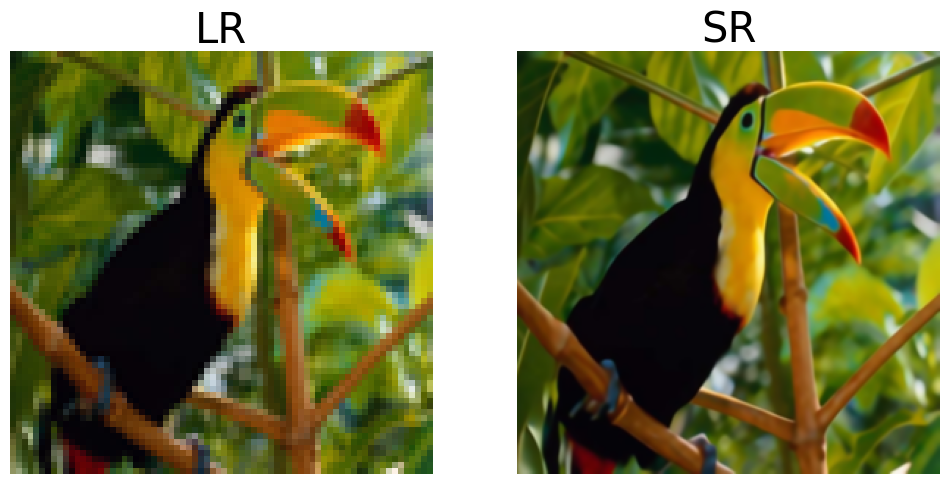

In [ ]:
# utils for visualization
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img


input_folder = upload_folder
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  img_output = imread(os.path.join(result_folder, os.path.basename(input_path)))
  total_figs = 2
  fig = plt.figure(figsize=(total_figs*6, 7))
  ax1 = fig.add_subplot(1, total_figs, 1)
  plt.title('LR', fontsize=30)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, total_figs, 2)
  plt.title('SR', fontsize=30)
  ax2.axis('off')
  ax1.imshow(img_input)
  ax2.imshow(img_output)
  break

# 5. View Results

The results are saved in the `./samples/results/` folder.

In [ ]:
# Results are saved in ./samples/results/
print(f"All results saved to: {result_folder}")
print(f"Total images processed: {len(os.listdir(result_folder))}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>